In [7]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# import library untuk ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# Path data
path_data = "autos.csv"

# read data dari file
autos = pd.read_csv(path_data, encoding='latin-1')

# Menampilkan 5 data teratas
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21


# Eksploration of Data & Preprocessing

Outline:
* Check data type and match with definition given by data source
* Check missing value and handle it
* Check Duplicated and handle it
* Check Inkonsistensi Data and handle it
* Check outlier and handle it

## Check Data Type

In [9]:
# Cek tipe data dari data autos
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39901 entries, 0 to 39900
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dateCrawled          39901 non-null  object 
 1   name                 39901 non-null  object 
 2   seller               39901 non-null  object 
 3   offerType            39901 non-null  object 
 4   price                39901 non-null  int64  
 5   abtest               39901 non-null  object 
 6   vehicleType          35723 non-null  object 
 7   yearOfRegistration   39901 non-null  int64  
 8   gearbox              37733 non-null  object 
 9   powerPS              39901 non-null  int64  
 10  model                37688 non-null  object 
 11  kilometer            39901 non-null  int64  
 12  monthOfRegistration  39901 non-null  int64  
 13  fuelType             36190 non-null  object 
 14  brand                39901 non-null  object 
 15  notRepairedDamage    32105 non-null 

1. Data berisi 20 kolom, dan ditemukan bahwa ada 13 kolom bertipe object, dan 7 kolom bertipe integer
2. Penamaan kolom menggunakan camelCase, hal tersebut tidak sesuai dengan aturan penamaan di Python
3. Ada beberapa kolom yang memiliki null value

kita akan mengubah nama kolom menjadi lebih mudah dibaca sehingga memudahkan dalam proses wrangling, nama kolom menggunkan format snake-case supaya lebih konsisten

In [10]:
#cek nama kolom
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [11]:
# mengubah nama kolom yang menggunakan camelCase menjadi snake-case
change_name_column = {'dateCrawled': 'date_crawled',
                      'offerType': 'offer_type',
                      'vehicleType': 'vehicle_type',
                      'yearOfRegistration': 'registration_year',
                      'powerPS': 'power_ps',
                      'monthOfRegistration': 'registration_month',
                      'fuelType': 'fuel_type',
                      'notRepairedDamage': 'unrepaired_damage',
                      'dateCreated': 'ad_created',
                      'nrOfPictures': 'nr_of_picture',
                      'postalCode': 'postal_code',
                      'lastSeen': 'last_seen',
                      }

autos = autos.rename(columns = change_name_column)
autos.head(2)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_picture,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50


## Ekploration of Data
#### Melihat statistik deskriptif semua kolom

In [12]:
# melihat statistik deskiptif semua kolom
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_picture,postal_code,last_seen
count,39901,39901,39901,39901,3.990100e+04,39901,35723,39901.000000,37733,39901.000000,37688,39901.000000,39901.000000,36190,39901,32105,39900,39900.0,39900.000000,39900
unique,38779,31621,1,2,NaN,2,8,NaN,2,NaN,244,NaN,NaN,7,40,3,68,NaN,NaN,32563
top,2016-03-21 12:38:30,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-04 00:00:00,NaN,NaN,2016-04-06 02:44:33
freq,3,82,39901,39900,NaN,20742,10288,NaN,29619,NaN,3147,NaN,NaN,23827,8413,28152,1574,NaN,NaN,7
mean,NaN,NaN,NaN,NaN,6.964185e+03,NaN,NaN,2004.680985,NaN,113.279767,NaN,125630.685948,5.741510,NaN,NaN,NaN,NaN,0.0,50716.844461,NaN
std,NaN,NaN,NaN,NaN,1.157854e+05,NaN,NaN,98.524132,NaN,119.717529,NaN,40091.031687,3.713283,NaN,NaN,NaN,NaN,0.0,25870.269049,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30171.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49593.000000,NaN
75%,NaN,NaN,NaN,NaN,7.100000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71570.000000,NaN


1. kolom yang paling banyak memiliki NaN nilai:
- seller, offer_type, vehicle_type, brand

2. Kolom yang memiliki nilai kosong:
- nr_of_picture

3. kolom yang membutuhkan penyelidikan lebih lanjut:
- registration_year: memiliki nilai min dan max yang tidak realistis
- price : memiliki nilai min dan max harga yang tidak realistis


In [13]:
# info dataset
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39901 entries, 0 to 39900
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_crawled        39901 non-null  object 
 1   name                39901 non-null  object 
 2   seller              39901 non-null  object 
 3   offer_type          39901 non-null  object 
 4   price               39901 non-null  int64  
 5   abtest              39901 non-null  object 
 6   vehicle_type        35723 non-null  object 
 7   registration_year   39901 non-null  int64  
 8   gearbox             37733 non-null  object 
 9   power_ps            39901 non-null  int64  
 10  model               37688 non-null  object 
 11  kilometer           39901 non-null  int64  
 12  registration_month  39901 non-null  int64  
 13  fuel_type           36190 non-null  object 
 14  brand               39901 non-null  object 
 15  unrepaired_damage   32105 non-null  object 
 16  ad_c

kita drop dulu kolom nr_of_picture karena semua data bernilai 0 dan juga tidak dibutuhkan dalam proses analisis

In [14]:
# hapus kolom nr_of_picture
del autos['nr_of_picture']

mengubah tipe data dari date_crawled dari object menjadi datetime

In [15]:
# Convert kolom date_crawled
autos.date_crawled = pd.to_datetime(autos.date_crawled, yearfirst=True)

# Tampilkan data tanggal dan waktu setelah diconvert
autos.date_crawled

0       2016-03-24 11:52:17
1       2016-03-24 10:58:45
2       2016-03-14 12:52:21
3       2016-03-17 16:54:04
4       2016-03-31 17:25:20
                ...        
39896   2016-03-24 00:57:00
39897   2016-03-31 18:55:48
39898   2016-03-08 09:57:12
39899   2016-03-28 17:54:18
39900   2016-03-14 13:50:46
Name: date_crawled, Length: 39901, dtype: datetime64[ns]

mengubah tipe data dari last_seen dari object menjadi datetime

In [16]:
# Convert kolom last_seen
autos.last_seen = pd.to_datetime(autos.last_seen, yearfirst=True)

# Tampilkan data tanggal dan waktu setelah diconvert
autos.last_seen

0       2016-04-07 03:16:57
1       2016-04-07 01:46:50
2       2016-04-05 12:47:46
3       2016-03-17 17:40:17
4       2016-04-06 10:17:21
                ...        
39896   2016-04-06 20:47:44
39897   2016-03-31 18:55:48
39898   2016-04-06 20:19:29
39899   2016-03-28 17:54:18
39900                   NaT
Name: last_seen, Length: 39901, dtype: datetime64[ns]

mengubah tipe data dari ad_created dari object menjadi datetime

In [17]:
# Convert kolom ad_created
autos.ad_created = pd.to_datetime(autos.ad_created, yearfirst=True)

# Tampilkan data tanggal dan waktu setelah diconvert
autos.ad_created

0       2016-03-24
1       2016-03-24
2       2016-03-14
3       2016-03-17
4       2016-03-31
           ...    
39896   2016-03-23
39897   2016-03-31
39898   2016-03-08
39899   2016-03-28
39900          NaT
Name: ad_created, Length: 39901, dtype: datetime64[ns]

In [18]:
# cek kembali tipe data tiap kolom
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39901 entries, 0 to 39900
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        39901 non-null  datetime64[ns]
 1   name                39901 non-null  object        
 2   seller              39901 non-null  object        
 3   offer_type          39901 non-null  object        
 4   price               39901 non-null  int64         
 5   abtest              39901 non-null  object        
 6   vehicle_type        35723 non-null  object        
 7   registration_year   39901 non-null  int64         
 8   gearbox             37733 non-null  object        
 9   power_ps            39901 non-null  int64         
 10  model               37688 non-null  object        
 11  kilometer           39901 non-null  int64         
 12  registration_month  39901 non-null  int64         
 13  fuel_type           36190 non-null  object    

## Cek Missing Value

In [19]:
# Mendapatkan jumlah missing value tiap kolom
# dan mengurutkan dari yang terbesar ke terkecil
missing = autos.isna().sum().sort_values(ascending = False)
# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_data = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(autos)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_data

,NaN_count,NaN_percentage
unrepaired_damage,7796,0.195384
vehicle_type,4178,0.104709
fuel_type,3711,0.093005
model,2213,0.055462
gearbox,2168,0.054334
last_seen,1,0.000025
postal_code,1,0.000025
ad_created,1,0.000025
registration_year,0,0.000000
seller,0,0.000000


In [20]:
#data teratas kolom yang memiliki nan
autos[["unrepaired_damage",
       "vehicle_type",
       "fuel_type",
       "model",
       "gearbox"]].head(3)

,unrepaired_damage,vehicle_type,fuel_type,model,gearbox
0,NaN,NaN,benzin,golf,manuell
1,ja,coupe,diesel,NaN,manuell
2,NaN,suv,diesel,grand,automatik


In [21]:
# cek info data yang memiliki missing value
autos[["unrepaired_damage",
       "vehicle_type",
       "fuel_type",
       "model",
       "gearbox"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39901 entries, 0 to 39900
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   unrepaired_damage  32105 non-null  object
 1   vehicle_type       35723 non-null  object
 2   fuel_type          36190 non-null  object
 3   model              37688 non-null  object
 4   gearbox            37733 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


- kolom unrepaired_damage : kita ubah nilai "NaN" menjadi "other"
- kolom vehicle_type : kita ubah nilai "NaN" menjadi "other"
- kolom fuel_type : kita ubah nilai "NaN" menjadi "other"
- kolom model : kita ubah nilai "NaN" menjadi "other"
- kolom gearbox : kita ubah nilai "NaN" menjadi "not-exist"

## Handle missing value

handle missing value pada kolom unrepaired_damage

In [22]:
# Mengganti nilai yang hilang dengan "other"
autos.unrepaired_damage.fillna('other', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.unrepaired_damage.unique()

array(['other', 'ja', 'nein', 'n'], dtype=object)

handle missing value pada kolom vehicle_type



In [23]:
# Mengganti nilai yang hilang dengan "other"
autos.vehicle_type.fillna('other', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.vehicle_type.unique()

array(['other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'bus', 'kombi', 'andere'], dtype=object)

handle missing value pada kolom fuel_type

In [24]:
# Mengganti nilai yang hilang dengan "other"
autos.fuel_type.fillna('other', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.fuel_type.unique()

array(['benzin', 'diesel', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

handle missing value pada kolom model

In [25]:
# Mengganti nilai yang hilang dengan "other"
autos.model.fillna('other', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.model

0             golf
1            other
2            grand
3             golf
4            fabia
           ...    
39896         golf
39897    ptcruiser
39898           a3
39899           a8
39900     a_klasse
Name: model, Length: 39901, dtype: object

handle missing value pada kolom gearbox


In [26]:
# Mengganti nilai yang hilang dengan "not-exist"
autos.gearbox.fillna('not-exist', inplace=True)

# Menampilkan DataFrame setelah mengganti nilai yang hilang
autos.gearbox.unique()

array(['manuell', 'automatik', 'not-exist'], dtype=object)

Cek Kembali Jumlah Missing Value

In [27]:
# Mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
missing = autos.isna().sum().sort_values(ascending = False)
# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_data = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(autos)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_data

,NaN_count,NaN_percentage
last_seen,1,0.000025
ad_created,1,0.000025
postal_code,1,0.000025
gearbox,0,0.000000
seller,0,0.000000
offer_type,0,0.000000
price,0,0.000000
abtest,0,0.000000
vehicle_type,0,0.000000
registration_year,0,0.000000


## Check Duplicated of Data

In [28]:
# cek jika terdapat data duplikat
autos[autos.duplicated()]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen


In [29]:
# menampilkan jumlah data yang duplikat
autos.duplicated().sum()

0

terdapat 4 data duplikat

## Handle Duplicated of Data

In [30]:
# Menghapus baris duplikat dari DataFrame 'autos' dan mempertahankan baris pertama
autos = autos.drop_duplicates(keep='first')

In [31]:
# cek kembali data
autos.duplicated().sum()

0

## Check Inconsistence and Handle it

In [32]:
# cek kolom seller
autos.seller.unique()

array(['privat'], dtype=object)

Data kolom seller ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [33]:
# mengganti isi kolom seller menjadi mudah dipahami
autos.seller = autos.seller.replace({'privat':'private',
                                     'gewerblich':'commercial'})
autos.seller.unique()

array(['private'], dtype=object)

In [34]:
# cek kolom offer type
autos.offer_type.unique()

array(['Angebot', 'Gesuch'], dtype=object)

Data kolom offer_type ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [35]:
# mengganti isi kolom offer_type menjadi mudah dipahami
autos.offer_type = autos.offer_type.replace({'Angebot':'Request',
                                             'Gesuch':'Offer'})
autos.offer_type.unique()

array(['Request', 'Offer'], dtype=object)

In [36]:
# cek kolom gearbox
autos.gearbox.unique()

array(['manuell', 'automatik', 'not-exist'], dtype=object)

Data kolom gearbox ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [37]:
# mengganti isi kolom gearbox menjadi mudah dipahami
autos.gearbox = autos.gearbox.replace({'manuell':'manual',
                                       'automatik':'automatic',
                                       'not-exist':'not-exist'})
autos.gearbox.unique()

array(['manual', 'automatic', 'not-exist'], dtype=object)

In [38]:
# cek kolom fuel_type
autos.fuel_type.unique()

array(['benzin', 'diesel', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

Data kolom fuel_type ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [39]:
# mengganti isi kolom gearbox menjadi mudah dipahami
autos.fuel_type = autos.fuel_type.replace({'benzin':'gasoline',
                                           'diesel':'automatic',
                                           'elektro':'electric'})
autos.fuel_type.unique()

array(['gasoline', 'automatic', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'electric'], dtype=object)

In [40]:
# cek kolom unrepaired_damage
autos.unrepaired_damage.unique()

array(['other', 'ja', 'nein', 'n'], dtype=object)

Data kolom unrepaired_damage ditemukan konsisten, namun kita ingin mengubah nama dengan bahasa Jerman dengan nama yang mudah dipahami

In [41]:
# mengganti isi kolom unrepaired_damage menjadi mudah dipahami
autos.unrepaired_damage = autos.unrepaired_damage.replace({'ja':'yes',
                                                           'nein':'no'})
autos.unrepaired_damage.unique()

array(['other', 'yes', 'no', 'n'], dtype=object)

ditemukan baris tahun yang tidak sesuai dengan tahun sekarang yaitu 2024 dan juga ditemukan tahun yang kurang dari tahun ditemukan mobil pertama kali yaitu tahun 1878 oleh Karl Benz

In [42]:
# cek kolom registration_year
autos.registration_year.unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955,
       1978, 1972, 1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936,
       5000, 1954, 1958, 9999, 1956, 3200, 1000, 1933, 1941, 1962, 8888,
       1500, 2200, 4100, 1929, 1951, 1957, 1940, 3000, 2066, 1949, 2019,
       1800, 1953, 1935])

In [43]:
# cek deskripsi dari komom registration_year
autos.registration_year.describe()

count    39901.000000
mean      2004.680985
std         98.524132
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

ditemukan data kolom tahun registrasi memiliki nilai yang tidak realistis.

tidak sesuai dengan tahun terakhir dataset dibuat, yaitu tahun 2016.
Dan juga ditemukan tahun yang kurang dari tahun ditemukan mobil pertama kali yaitu tahun 1878 oleh Karl Benz

In [44]:
# drop baris yang memiliki tahun dibawaah 1878 dan tahun diatas 2016
autos = autos[(autos.registration_year >= 1878) & (autos.registration_year <= 2016)]

autos.registration_year

0        1993
1        2011
2        2004
3        2001
4        2008
         ... 
39896    2015
39897    2003
39898    2011
39899    2009
39900    2002
Name: registration_year, Length: 38270, dtype: int64

In [45]:
# cek kolom registration_month
autos.registration_month.unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

kita akan mengubah data bulan menjadi 1 - 12, lalu ubah menjadi Jan-Dec

In [46]:
#mengubah nilai bulan
autos.registration_month.replace([0,12],[1,12],inplace=True)

#mengubah nilai bulan dari 1-12 menjadi Jan - Des
months = ["Jan", "Feb", "Mar" ,"Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

#mengubah nilai bulan dari 1-12 menjadi Jan - Des
autos.registration_month.replace([1,2,3,4,5,6,7,8,9,10,11, 12],months,inplace=True)

# cek kolom registration_month kembali
autos.registration_month.unique()

<ipython-input-46-01cf69f6d844>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos.registration_month.replace([0,12],[1,12],inplace=True)
<ipython-input-46-01cf69f6d844>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos.registration_month.replace([1,2,3,4,5,6,7,8,9,10,11, 12],months,inplace=True)


array(['Jan', 'May', 'Aug', 'Jun', 'Jul', 'Oct', 'Dec', 'Nov', 'Feb',
       'Mar', 'Apr', 'Sep'], dtype=object)

## Check Outlier

- Outlier biasanya terdapat pada kolom bertipe numeric.
- Pada kasus kali ini, kita akan mengidentifikasi outlier pada kolom price.
- Kita dapat menampilkan sebaran data price menggunakan boxplot

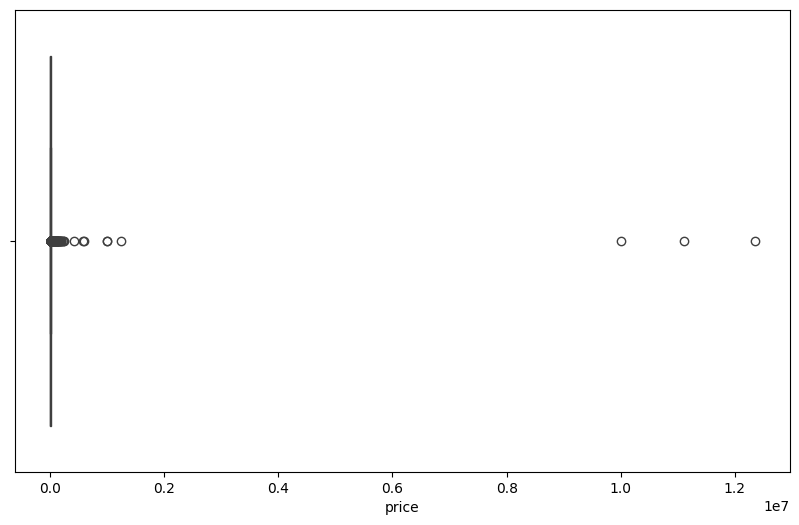

In [47]:
# Buat figure & axes
fig, ax = plt.subplots(figsize=(10, 6))

# Buat boxplot untuk kolom "price"
sns.boxplot(data=autos,
            x="price",
            ax=ax)

# Tampilkan plot
plt.show()

kita cek dulu statistik deskripsinya

In [48]:
# cek statistik deskriptif
autos.price.describe()

count    3.827000e+04
mean     6.791164e+03
std      9.999025e+04
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.300000e+03
max      1.234568e+07
Name: price, dtype: float64

 cek kemunculan harga paling tinggi pada kolom price

In [49]:
# cek harga paling tinggi
autos.price.value_counts().sort_index(ascending=False).head()

12345678    1
11111111    1
9999999     1
1250000     1
1000000     1
Name: price, dtype: int64

hapus outlier harga yang memiliki nilai > 9999999 karena harga tersebut tidak menjadikan harga serius yang ditawarkan

In [50]:
# Menghapus baris yang memiliki nilai lebih dari 9999999 di kolom 'price'
autos = autos.loc[autos.price < 9999999]
# cek harga kembali
autos.price.value_counts().sort_index(ascending=False).head(2)

1250000    1
1000000    1
Name: price, dtype: int64

In [51]:
#cek harga yang memiliki nilai 0
autos.price.value_counts().sort_index(ascending=False).tail()

5       4
3       1
2       3
1     119
0    1121
Name: price, dtype: int64

ternyata terdapat kemunculan harga 0 sebanyak 10014. kita cek dulu berapa presentasenya

In [52]:
# Hitung jumlah nilai 0 dalam kolom tertentu
jumlah_nilai_0 = (autos.price.values == 0).sum()

# Hitung jumlah total baris
jumlah_total_baris = autos.shape[0]

# Hitung persentase nilai 0
persentase_nilai_0 = (jumlah_nilai_0 / jumlah_total_baris) * 100

print(f"Persentase nilai 0 dalam kolom 'price': {persentase_nilai_0:.2f}%")

Persentase nilai 0 dalam kolom 'price': 2.93%


Ternyata nilai harga pada kolom price yang bernilai 0.0 berjumlah
2.81% dari total seluruh data. maka solusinya adalah dengan
menghapus semua data yang bernilai 0



In [53]:
# Menghapus baris yang memiliki nilai 0.0 di kolom 'price'
autos = autos[autos.price != 0.0]

#cek kembali data kolom price
autos.price.value_counts().sort_index(ascending=False).tail()

8      2
5      4
3      1
2      3
1    119
Name: price, dtype: int64

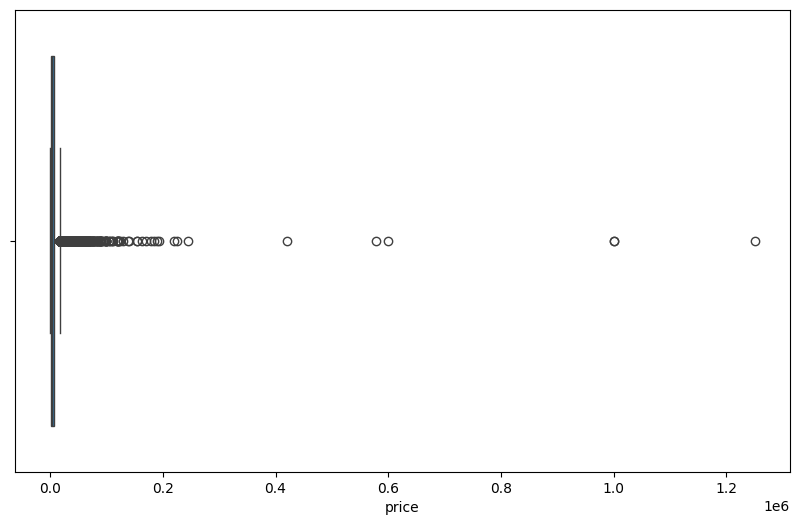

In [54]:
# Buat figure & axes
fig, ax = plt.subplots(figsize=(10, 6))

# Buat boxplot untuk kolom "price"
sns.boxplot(data=autos,
            x="price",
            ax=ax)

# Tampilkan plot
plt.show()

outlier setidaknya berkurang, namun kita harus menyelidiki lebih lanjut untuk menangani outlier

In [55]:
# cek statistik deskriptif kembali
autos.price.describe()

count    3.714600e+04
mean     6.095974e+03
std      1.385220e+04
min      1.000000e+00
25%      1.250000e+03
50%      3.150000e+03
75%      7.500000e+03
max      1.250000e+06
Name: price, dtype: float64

In [56]:
# Cari Q1 & Q3
Q1 = autos.price.quantile(0.25)
Q3 = autos.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 1250.00
Q3 : 7500.00


In [57]:
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 6250.00
Maximum Boundary : 16875.00


In [58]:
# Filter data tanpa outlier
autos = autos[autos["price"] < max_bound]

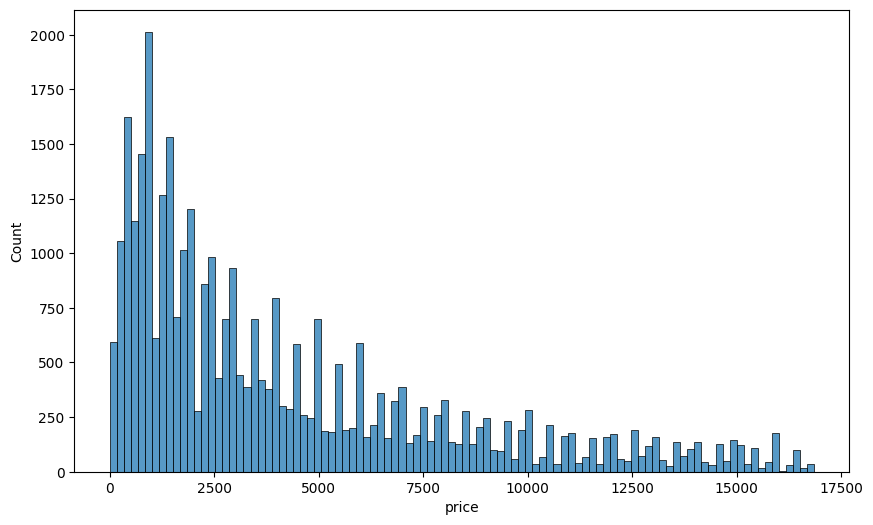

In [59]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = autos,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

In [60]:
# Validasi hasil filter
autos["price"].describe()

count    34338.000000
mean      4208.017823
std       3959.020736
min          1.000000
25%       1199.000000
50%       2800.000000
75%       6050.000000
max      16850.000000
Name: price, dtype: float64

Terlihat Q3 dan nilai maximum masih berbeda jauh
Outlier telah belum sepenuhnya dihilangkan.
kita coba sekali lagi

In [61]:
# Cari Q1 & Q3
Q1 = autos.price.quantile(0.25)
Q3 = autos.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 1199.00
Q3 : 6050.00


In [62]:
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 4851.00
Maximum Boundary : 13326.50


In [63]:
# Filter data tanpa outlier
autos = autos[autos["price"] < max_bound]

In [64]:
# Validasi hasil filter
autos["price"].describe()

count    32776.000000
mean      3698.543446
std       3266.575767
min          1.000000
25%       1100.000000
50%       2550.000000
75%       5500.000000
max      13300.000000
Name: price, dtype: float64

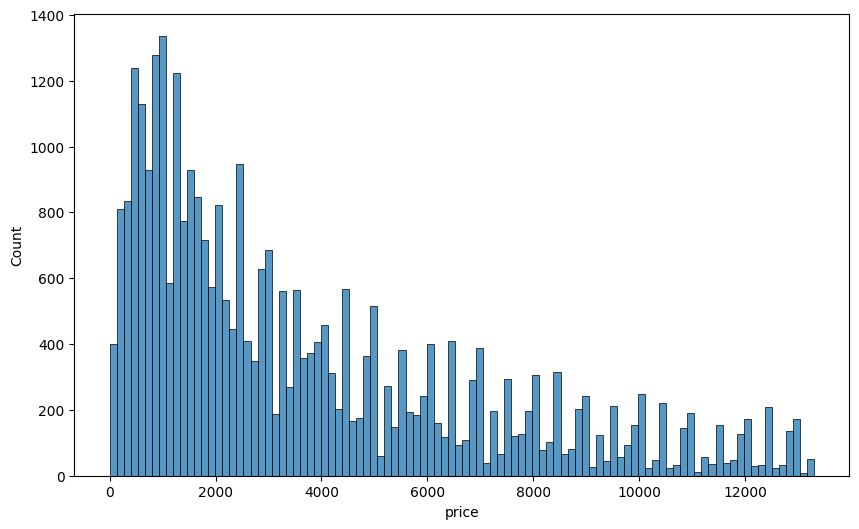

In [65]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = autos,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

ternyata distribusinya masih miring ke kanan kita coba melihat sebaran outlier dari 'price' berdasarkan 'vehicle_type'

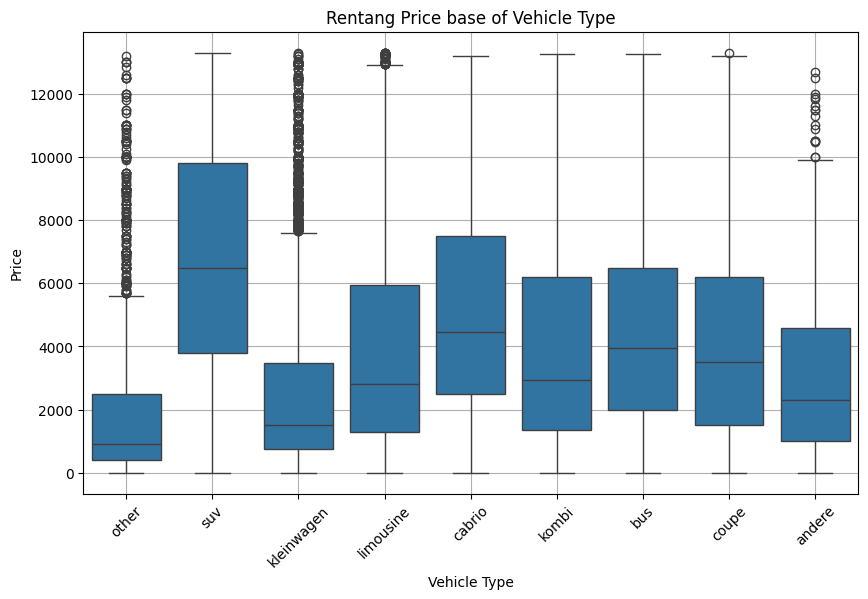

In [66]:
# Membuat boxplot
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.boxplot(x='vehicle_type', y='price', data=autos)
plt.title('Rentang Price base of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Memutar label sumbu x agar mudah dibaca
plt.grid(True)
plt.show()

ternyata terdapat outlier dari beberapa tipe mesin.
kita akan mengubah harga berdasarkan IQR, kita cari tahu dulu IQR dari masing-masing tipe

In [67]:
# Menghitung IQR, Q1, dan Q3 dari price digroup berdasarkan vehicle_type
result = autos.groupby('vehicle_type')['price'].describe(percentiles=[.25, .75])

# Menghitung IQR
result['IQR'] = result['75%'] - result['25%']

# Menampilkan hasil
result['IQR']

vehicle_type
andere        3580.00
bus           4500.00
cabrio        4986.75
coupe         4700.00
kleinwagen    2740.00
kombi         4850.00
limousine     4650.00
other         2100.00
suv           6000.00
Name: IQR, dtype: float64

In [68]:
# Menghapus outlier sesuai dengan data IQR
autos = autos[(autos.vehicle_type == 'andere') & (autos.price <= 3500) |
              (autos.vehicle_type == 'bus') & (autos.price <= 4790) |
              (autos.vehicle_type == 'cabrio') & (autos.price <= 5300) |
              (autos.vehicle_type == 'coupe') & (autos.price <= 5001) |
              (autos.vehicle_type == 'kleinwagen') & (autos.price <= 2710) |
              (autos.vehicle_type == 'kombi') & (autos.price <= 4920) |
              (autos.vehicle_type == 'limousine') & (autos.price <= 4699) |
              (autos.vehicle_type == 'other') & (autos.price <= 2099) |
              (autos.vehicle_type == 'suv') & (autos.price <= 6250)]

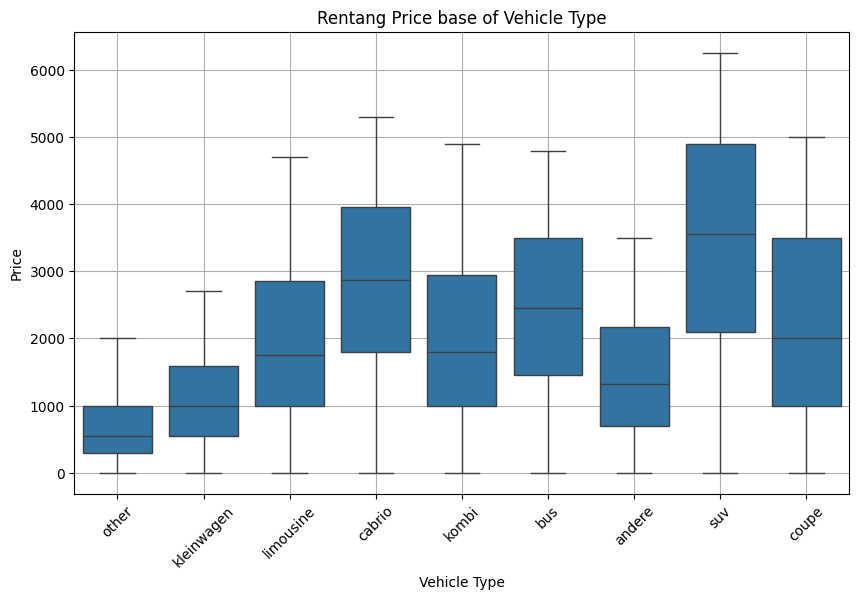

In [69]:
# Membuat boxplot
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.boxplot(x='vehicle_type', y='price', data=autos)
plt.title('Rentang Price base of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Memutar label sumbu x agar mudah dibaca
plt.grid(True)
plt.show()

kita cek kembali data price

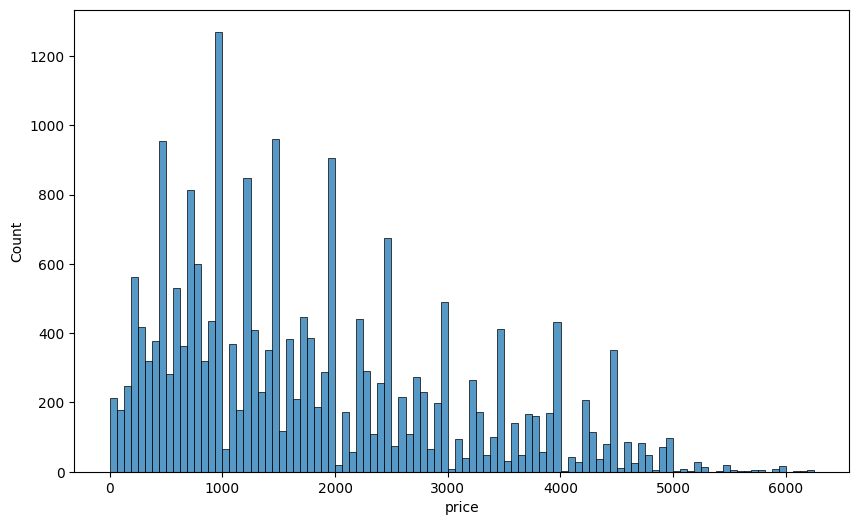

In [70]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = autos,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

In [71]:
autos.price.describe()

count    21655.000000
mean      1789.244516
std       1255.454752
min          1.000000
25%        799.000000
50%       1500.000000
75%       2500.000000
max       6250.000000
Name: price, dtype: float64

- Terlihat Q3 dan nilai maximum sudah tidak berbeda jauh
- Outlier telah dihilangkan

## Eksport Dataset

In [72]:
#eksport dataset yang telah dicleaning
autos.to_csv('autos_cleaned.csv', index=False)